In [20]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

# Display first 5 rows
Dataset_Train.head()
Dataset_Test.head()

,age,gender,height_cm,weight_kg,activity_group,duration_minutes,intensity,calories_burned,daily_steps,avg_heart_rate,...,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,fitness_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,bmi
0,59,F,161.3,60.16,"High-Impact Cardio, Sport-Based Cardio, Strength",67.550893,"Medium, Low",14.823214,8537.102679,118.308036,...,106.6,69.1,11.35,9.199107,7.116518,4,2.483482,Never,healthy,23.122729
1,61,F,163.7,50.55,"High-Impact Cardio, Recreational, Sport-Based ...",70.856332,"Medium, Low",11.834498,8504.401747,117.139738,...,122.5,70.2,10.41,9.185109,6.997817,5,2.464629,Current,Diabetes,18.863566
2,21,M,178.4,74.84,"Strength, High-Impact Cardio, Low-Impact Cardio",70.175217,"Medium, Low",21.477391,8560.817391,146.982609,...,114.8,91.2,15.72,9.153652,7.052609,5,2.481739,Never,healthy,23.514951
3,50,M,172.9,60.69,"Sport-Based Cardio, Strength, Recreational",78.554065,"Medium, Low",17.593496,8596.597561,124.369919,...,103.1,83.4,14.09,10.280772,7.045528,5,2.483333,Former,healthy,20.301454
4,63,F,161.8,51.87,"Sport-Based Cardio, High-Impact Cardio, Low-Im...",78.097727,"Medium, Low",15.026364,8693.331818,116.650000,...,135.1,73.3,12.66,9.228682,7.060455,5,2.485455,Never,Asthma,19.813409


In [21]:
Dataset_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2400 non-null   int64  
 1   gender                    2400 non-null   object 
 2   height_cm                 2400 non-null   float64
 3   weight_kg                 2400 non-null   float64
 4   activity_group            2400 non-null   object 
 5   duration_minutes          2400 non-null   float64
 6   intensity                 2400 non-null   object 
 7   calories_burned           2400 non-null   float64
 8   daily_steps               2400 non-null   float64
 9   avg_heart_rate            2400 non-null   float64
 10  resting_heart_rate        2400 non-null   float64
 11  blood_pressure_systolic   2400 non-null   float64
 12  blood_pressure_diastolic  2400 non-null   float64
 13  endurance_level           2400 non-null   float64
 14  fitness_

In [22]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('object')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('object')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    object
dtype: object
stress_level    object
dtype: object


In [23]:
Dataset_Train['activity_group'] = (
    Dataset_Train['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)
Dataset_Test['activity_group'] = (
    Dataset_Test['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)

🔹 Class Counts:
health_condition
healthy         1711
Hypertension     347
Diabetes         226
Asthma           116
Name: count, dtype: int64

🔹 Class Percentages:
health_condition
healthy         71.29
Hypertension    14.46
Diabetes         9.42
Asthma           4.83
Name: proportion, dtype: float64


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_6588\1390208334.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='health_condition', data=Dataset_Train, palette='Set2')


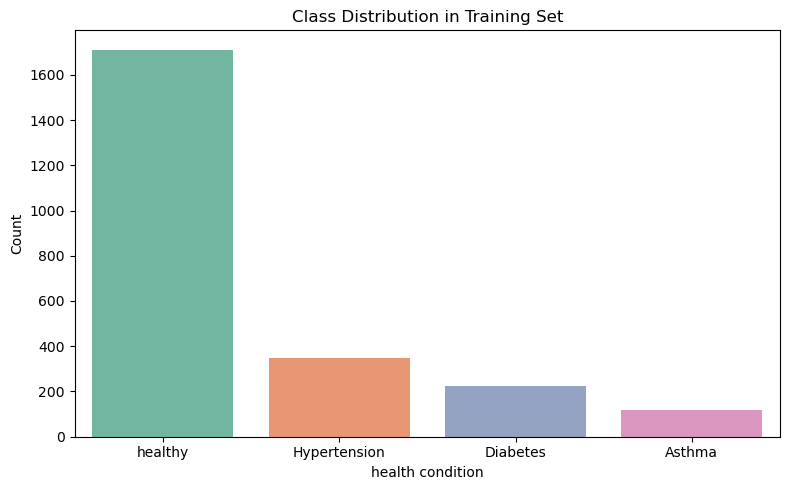

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of instances in each class
class_counts = Dataset_Train['health_condition'].value_counts()
class_percentages = Dataset_Train['health_condition'].value_counts(normalize=True) * 100

# Display results
print("🔹 Class Counts:")
print(class_counts)
print("\n🔹 Class Percentages:")
print(class_percentages.round(2))

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='health_condition', data=Dataset_Train, palette='Set2')
plt.title("Class Distribution in Training Set")
plt.xlabel("health condition")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


✅ Train Accuracy: 1.0
✅ Test Accuracy: 0.7116666666666667

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      1.00      0.83       427

    accuracy                           0.71       600
   macro avg       0.18      0.25      0.21       600
weighted avg       0.51      0.71      0.59       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


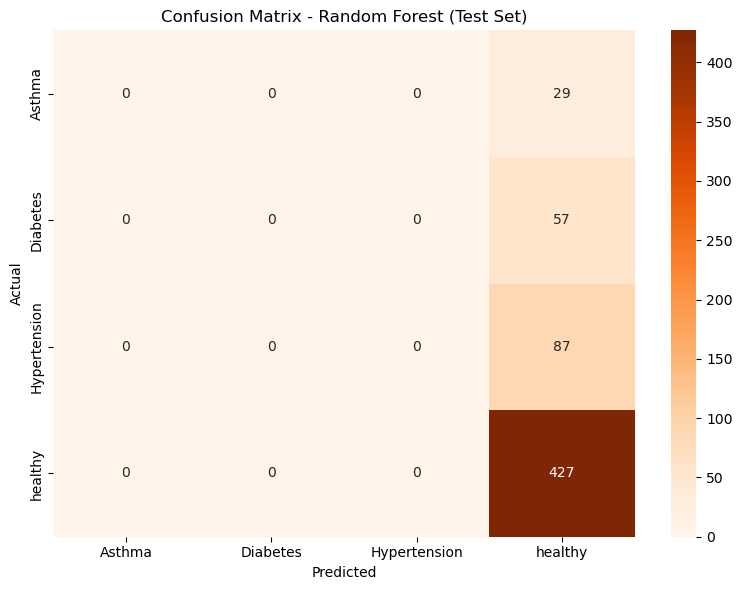

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1️⃣ Prepare Features and Target
# ==========================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ==========================================
# 2️⃣ Identify column types
# ==========================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ==========================================
# 3️⃣ Preprocessing (Scaling + OneHotEncoding)
# ==========================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ==========================================
# 4️⃣ Encode the Target Variable
# ==========================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==========================================
# 5️⃣ Train Random Forest Classifier
# ==========================================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # handles imbalance if present
)
rf_model.fit(X_train_processed, y_train_encoded)

# ==========================================
# 6️⃣ Predictions
# ==========================================
y_train_pred = le.inverse_transform(rf_model.predict(X_train_processed))
y_test_pred = le.inverse_transform(rf_model.predict(X_test_processed))

# ==========================================
# 7️⃣ Evaluation
# ==========================================
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ==========================================
# 8️⃣ Confusion Matrix (Test Set)
# ==========================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in Dataset_Train
X = Dataset_Train.drop(columns=['health_condition'])
y = Dataset_Train['health_condition']

# Split train/test if needed (optional)
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# 3. Fit preprocessor and transform features
X_processed = preprocessor.fit_transform(X)

# 4. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# 5. Optional: Check new class distribution
print("✅ Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Now you can use X_resampled and y_resampled to train your models


✅ Class distribution after SMOTE:
health_condition
healthy         1711
Hypertension    1711
Diabetes        1711
Asthma          1711
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


🔹 Train Accuracy: 1.0
🔹 Test Accuracy : 0.7

🔹 Classification Report (Test):

              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.43      0.03      0.06        87
     healthy       0.71      0.98      0.82       427

    accuracy                           0.70       600
   macro avg       0.28      0.25      0.22       600
weighted avg       0.57      0.70      0.59       600



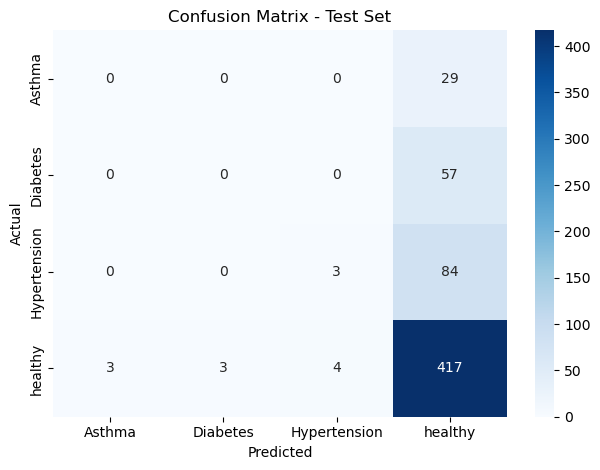

In [16]:
#random forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 1: Define target and features
target_col = 'health_condition'
X_train_raw = Dataset_Train.drop(columns=[target_col])
y_train_raw = Dataset_Train[target_col]
X_test = Dataset_Test.drop(columns=[target_col])
y_test = Dataset_Test[target_col]

# 📌 Step 2: Identify feature types
numeric_cols = X_train_raw.select_dtypes(include='number').columns.tolist()
categorical_cols = X_train_raw.select_dtypes(include=['object', 'category']).columns.tolist()

# 📌 Step 3: Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# 📌 Step 4: Preprocess training data and apply SMOTE
X_train_processed = preprocessor.fit_transform(X_train_raw)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_raw)

# 📌 Step 5: Preprocess test data
X_test_processed = preprocessor.transform(X_test)

# 📌 Step 6: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 📌 Step 7: Predictions
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test_processed)

# 📌 Step 8: Evaluation
print("🔹 Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("🔹 Test Accuracy :", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import recall_score, f1_score

# ================================================
# 🔍 Additional Evaluation Metrics
# ================================================

# Weighted Sensitivity (Recall)
train_sensitivity = recall_score(y_train_resampled, y_train_pred, average='weighted')
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Weighted F1 Score
train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Display results
print("\n🔹 Additional Performance Metrics 🔹")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall):  {test_sensitivity:.4f}")
print(f"✅ Train F1 Score:             {train_f1:.4f}")
print(f"✅ Test F1 Score:              {test_f1:.4f}")



🔹 Additional Performance Metrics 🔹
✅ Train Sensitivity (Recall): 1.0000
✅ Test Sensitivity (Recall):  0.7000
✅ Train F1 Score:             1.0000
✅ Test F1 Score:              0.5946


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Train Accuracy: 1.0
✅ Test Accuracy : 0.6983333333333334

🔹 Classification Report (Test):

              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.33      0.02      0.03        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      0.98      0.82       427

    accuracy                           0.70       600
   macro avg       0.26      0.25      0.21       600
weighted avg       0.54      0.70      0.59       600



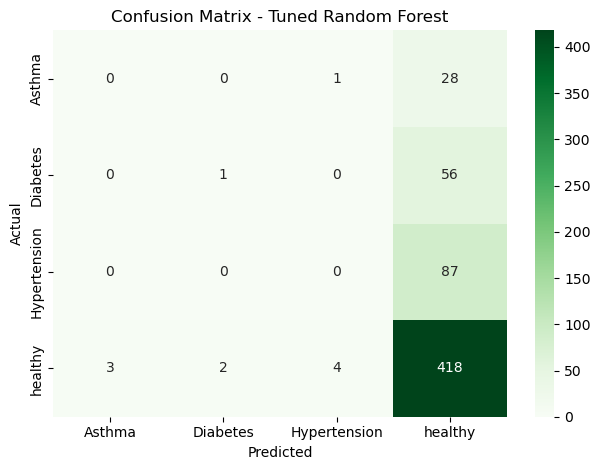

In [6]:
#Hyper parameter tune and fitting random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Step 2: Preprocess training data
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test)

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_raw)

# Step 4: Define model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 5: GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled, y_train_resampled)

# Step 6: Best estimator
best_rf = grid_search.best_estimator_

# Step 7: Evaluation
y_train_pred = best_rf.predict(X_train_resampled)
y_test_pred = best_rf.predict(X_test_processed)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("✅ Test Accuracy :", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
